<h1>Story telling from data set on adult income</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.groupby('income').describe().T

income                        <=50K          >50K
age             count  3.715500e+04  1.168700e+04
                mean   3.687218e+01  4.427518e+01
                std    1.410412e+01  1.055898e+01
                min    1.700000e+01  1.900000e+01
                25%    2.500000e+01  3.600000e+01
                50%    3.400000e+01  4.300000e+01
                75%    4.600000e+01  5.100000e+01
                max    9.000000e+01  9.000000e+01
fnlwgt          count  3.715500e+04  1.168700e+04
                mean   1.900396e+05  1.884706e+05
                std    1.065776e+05  1.024427e+05
                min    1.228500e+04  1.376900e+04
                25%    1.172100e+05  1.189425e+05
                50%    1.788110e+05  1.767290e+05
                75%    2.389170e+05  2.335050e+05
                max    1.490400e+06  1.226583e+06
educational-num count  3.715500e+04  1.168700e+04
                mean   9.598493e+00  1.160281e+01
                std    2.437673e+00  2.382624e+00
                min    1.000000e+00  1.000000e+00
                25%    9.000000e+00  1.000000e+01
                50%    9.000000e+00  1.200000e+01
                75%    1.000000e+01  1.300000e+01
                max    1.600000e+01  1.600000e+01
capital-gain    count  3.715500e+04  1.168700e+04
                mean   1.470103e+02  4.042239e+03
                std    9.367537e+02  1.475677e+04
                min    0.000000e+00  0.000000e+00
                25%    0.000000e+00  0.000000e+00
                50%    0.000000e+00  0.000000e+00
                75%    0.000000e+00  0.000000e+00
                max    4.131000e+04  9.999900e+04
capital-loss    count  3.715500e+04  1.168700e+04
                mean   5.415193e+01  1.935290e+02
                std    3.133200e+02  5.932116e+02
                min    0.000000e+00  0.000000e+00
                25%    0.000000e+00  0.000000e+00
                50%    0.000000e+00  0.000000e+00
                75%    0.000000e+00  0.000000e+00
                max    4.356000e+03  3.683000e+03
hours-per-week  count  3.715500e+04  1.168700e+04
                mean   3.884005e+01  4.545290e+01
                std    1.235685e+01  1.109118e+01
                min    1.000000e+00  1.000000e+00
                25%    3.500000e+01  4.000000e+01
                50%    4.000000e+01  4.000000e+01
                75%    4.000000e+01  5.000000e+01
                max    9.900000e+01  9.900000e+01

In [7]:
num = df.select_dtypes(include='int64')
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   fnlwgt           48842 non-null  int64
 2   educational-num  48842 non-null  int64
 3   capital-gain     48842 non-null  int64
 4   capital-loss     48842 non-null  int64
 5   hours-per-week   48842 non-null  int64
dtypes: int64(6)
memory usage: 2.2 MB


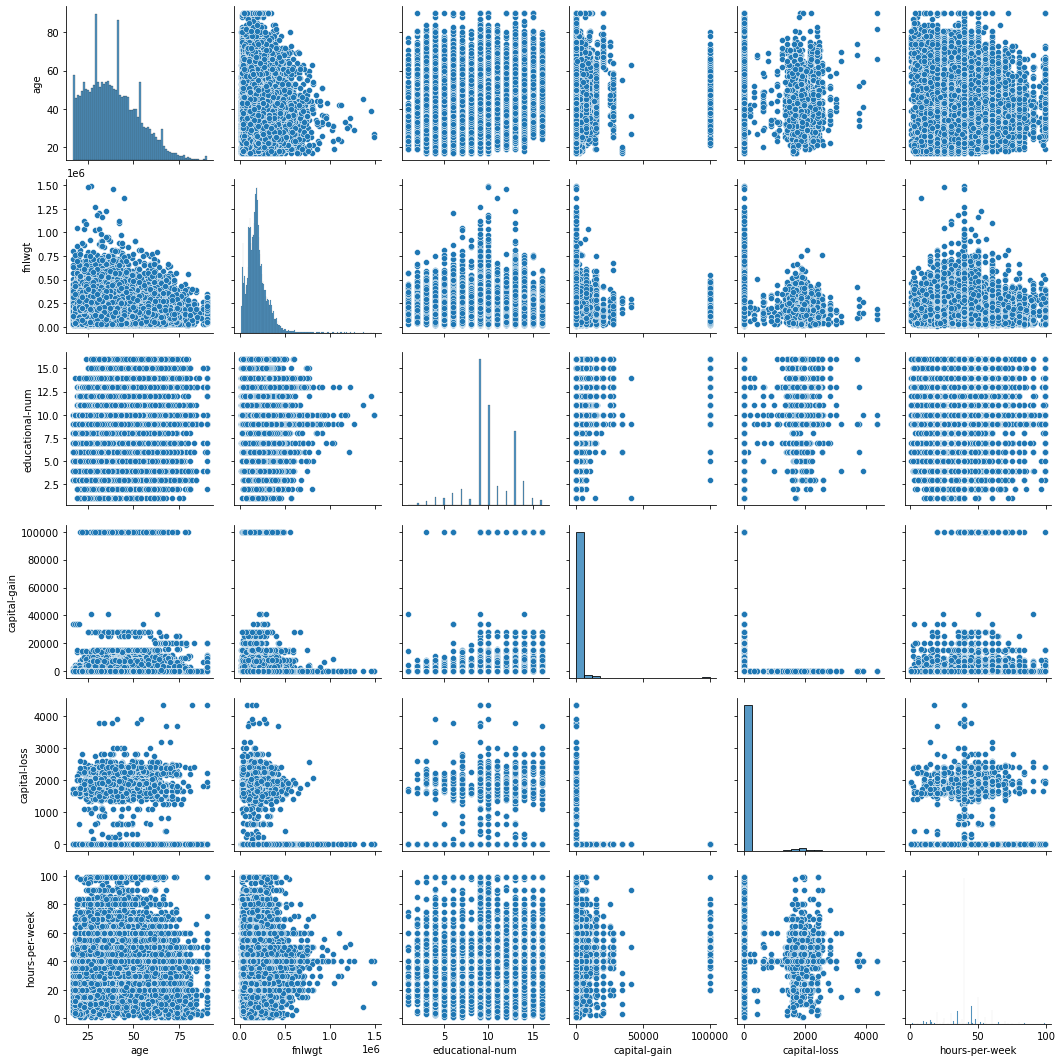

In [8]:
sns.pairplot(num)

<AxesSubplot:>

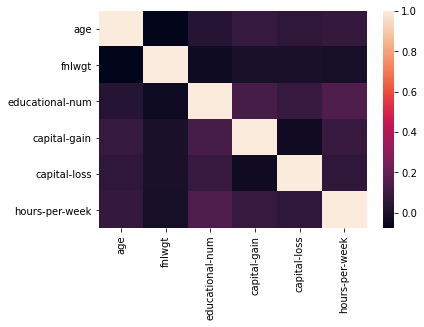

In [9]:
sns.heatmap(num.corr())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [11]:
df.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
df = df.drop('education',axis=1)

In [13]:
df = df.drop('fnlwgt',axis=1)

In [14]:
df.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [15]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [16]:
df.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [17]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [18]:
df.race.unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [19]:
df['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [20]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [21]:
df = df.drop(['relationship','capital-gain','capital-loss'],axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   educational-num  48842 non-null  int64 
 3   marital-status   48842 non-null  object
 4   occupation       48842 non-null  object
 5   race             48842 non-null  object
 6   gender           48842 non-null  object
 7   hours-per-week   48842 non-null  int64 
 8   native-country   48842 non-null  object
 9   income           48842 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [24]:
X = df.drop('income',axis=1)
y = df.income

X = pd.get_dummies(X)
y = y.map({'<=50K':0,'>50K':1})

In [25]:
rf = RandomForestClassifier()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [62]:
params = {
    'n_estimators': np.arange(50,200,50),
    'max_depth': np.arange(1,15,3)
}

rf_cv = GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1)

In [63]:
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  4,  7, 10, 13]),
                         'n_estimators': array([ 50, 100, 150])})

In [64]:
rf_cv.best_params_

{'max_depth': 13, 'n_estimators': 100}

In [65]:
from sklearn.model_selection import cross_validate

In [66]:
rf_cv.best_score_

0.8352216628455198

In [67]:
rf_best = rf_cv.best_estimator_

In [68]:
from sklearn.metrics import f1_score

In [69]:
score = f1_score(y_test,rf_best.predict(X_test))

In [70]:
score

0.5999583940087372

In [71]:
y_pred = rf_best.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

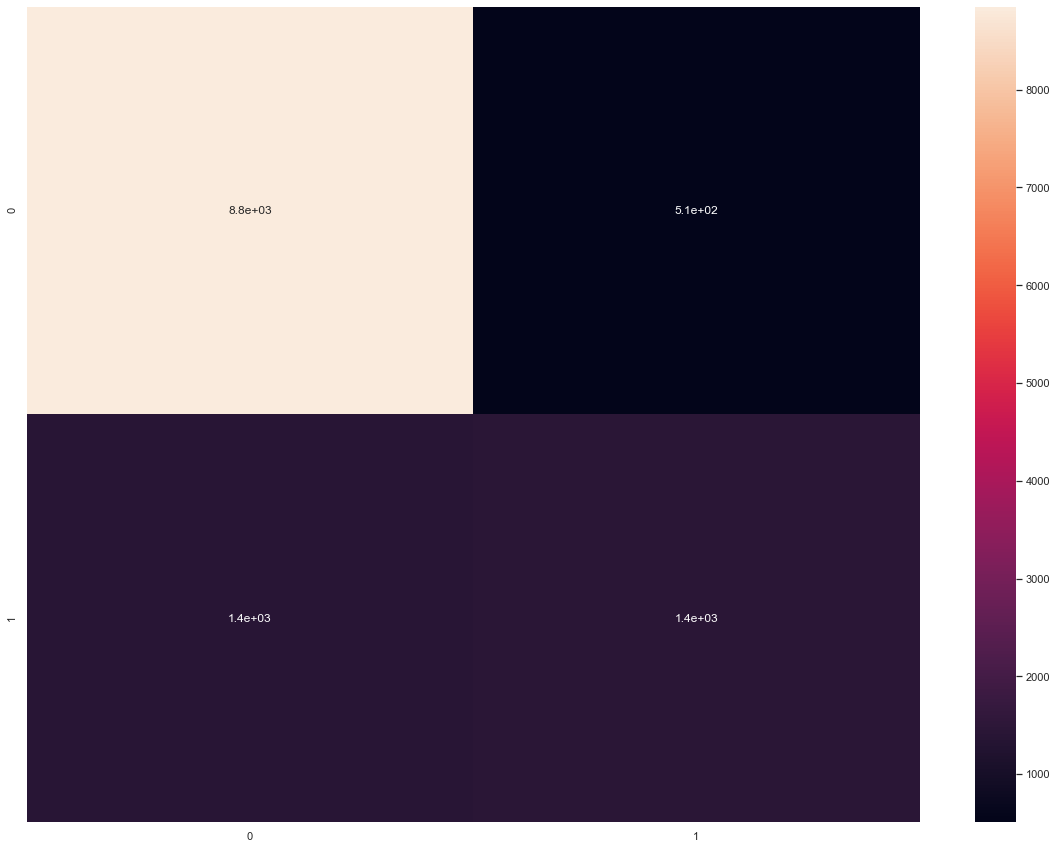

In [73]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [74]:
rf_best.feature_importances_

array([1.17458189e-01, 1.82308064e-01, 7.75090078e-02, 2.43348479e-03,
       5.25879777e-03, 3.57650699e-03, 5.97739217e-06, 5.53491933e-03,
       1.29295460e-02, 7.67067448e-03, 2.33850167e-03, 9.76218157e-05,
       2.60823209e-02, 7.35870403e-04, 2.35139367e-01, 1.62402229e-03,
       8.19309694e-02, 4.28825295e-03, 3.75989777e-03, 3.09952581e-03,
       3.81058873e-03, 8.87705847e-05, 4.37007858e-03, 4.26066418e-02,
       5.92266715e-03, 4.78819638e-03, 4.82401354e-03, 1.58111348e-02,
       2.82789298e-04, 4.09800607e-02, 1.33114105e-03, 4.53469540e-03,
       2.99399900e-03, 2.75683750e-03, 1.24288001e-03, 2.39858533e-03,
       3.93430803e-03, 8.08804107e-04, 5.17555153e-03, 2.86121690e-02,
       2.37554349e-02, 2.00920621e-03, 3.71178615e-04, 1.25216467e-03,
       6.40443792e-04, 2.27420086e-04, 5.98620715e-04, 2.05892565e-04,
       1.04224103e-04, 1.54692351e-04, 9.36573747e-04, 4.44022037e-04,
       8.04509084e-04, 6.73953911e-04, 1.33111553e-04, 1.36257989e-04,
      

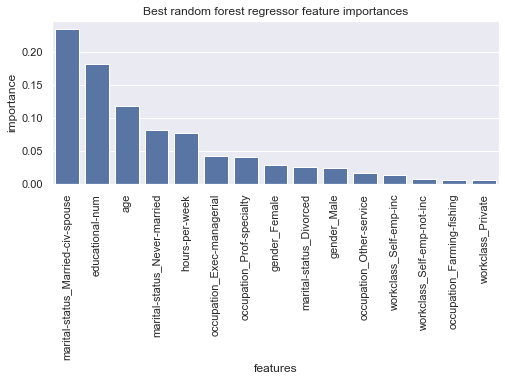

In [78]:
rf_feat_imps = pd.Series(rf_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importance = rf_feat_imps.iloc[:15]
sns.set(rc={'figure.figsize':(8,3)})
fig = sns.barplot(x=importance.index,y=importance,color='b')
_ =plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

plt.savefig('importance')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   educational-num  48842 non-null  int64 
 3   marital-status   48842 non-null  object
 4   occupation       48842 non-null  object
 5   race             48842 non-null  object
 6   gender           48842 non-null  object
 7   hours-per-week   48842 non-null  int64 
 8   native-country   48842 non-null  object
 9   income           48842 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB


In [42]:
df.groupby('marital-status').count()

,age,workclass,educational-num,occupation,race,gender,hours-per-week,native-country,income
marital-status,,,,,,,,,
Divorced,6633,6633,6633,6633,6633,6633,6633,6633,6633
Married-AF-spouse,37,37,37,37,37,37,37,37,37
Married-civ-spouse,22379,22379,22379,22379,22379,22379,22379,22379,22379
Married-spouse-absent,628,628,628,628,628,628,628,628,628
Never-married,16117,16117,16117,16117,16117,16117,16117,16117,16117
Separated,1530,1530,1530,1530,1530,1530,1530,1530,1530
Widowed,1518,1518,1518,1518,1518,1518,1518,1518,1518


In [43]:
df.groupby('income').describe()

age                                                      \
          count       mean        std   min   25%   50%   75%   max   
income                                                                
<=50K   37155.0  36.872184  14.104118  17.0  25.0  34.0  46.0  90.0   
>50K    11687.0  44.275178  10.558983  19.0  36.0  43.0  51.0  90.0   

       educational-num             ...             hours-per-week             \
                 count       mean  ...   75%   max          count       mean   
income                             ...                                         
<=50K          37155.0   9.598493  ...  10.0  16.0        37155.0  38.840048   
>50K           11687.0  11.602807  ...  13.0  16.0        11687.0  45.452896   

                                                
              std  min   25%   50%   75%   max  
income                                          
<=50K   12.356849  1.0  35.0  40.0  40.0  99.0  
>50K    11.091176  1.0  40.0  40.0  50.0  99.0  

[2 rows x 24 columns]

In [44]:
371550/(371550+11687)

0.9695045102638837

In [45]:
rich = df[df.income == '>50K']
poor = df[df.income == '<=50K']

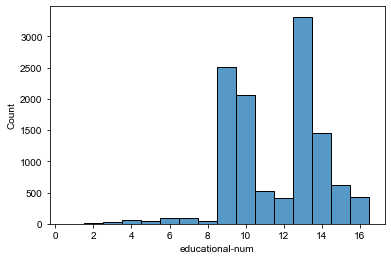

In [46]:
sns_plot = sns.histplot(rich['educational-num'], discrete=True, bins = 16)
sns.set(rc={'figure.figsize':(7.5,5)})
fig = sns_plot.get_figure()
fig.savefig("r_ed.png")

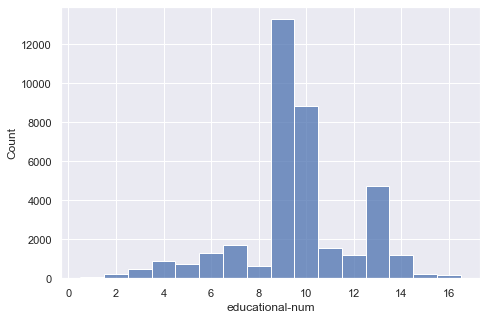

In [47]:
sns_plot = sns.histplot(poor['educational-num'], discrete=True, bins = 16)
sns.set(rc={'figure.figsize':(7.5,5)})
fig = sns_plot.get_figure()
fig.savefig("p_ed.png")

<AxesSubplot:xlabel='income', ylabel='educational-num'>

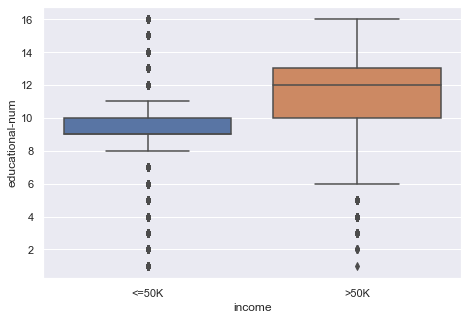

In [48]:
from scipy.stats import ttest_ind
import scipy.stats as st
from scipy import stats

sns.boxplot(data=df, x='income',y='educational-num')

In [49]:

r = [np.mean(np.random.choice(rich['educational-num'],500)) for i in range(rich.shape[0])]
p = [np.mean(np.random.choice(poor['educational-num'],500)) for i in range(rich.shape[0])]


ttest_ind(r,p)

Ttest_indResult(statistic=1420.3982250286192, pvalue=0.0)

In [50]:

r = np.array([np.mean(np.random.choice(rich['educational-num'])) for i in range(rich.shape[0])])
p = np.array([np.mean(np.random.choice(poor['educational-num'])) for i in range(rich.shape[0])])

diff = np.abs(r-p)

In [51]:
np.round(st.t.interval(0.95, len(diff)-1, loc=np.mean(diff), scale=st.sem(diff)),2)

array([3.03, 3.12])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   educational-num  48842 non-null  int64 
 3   marital-status   48842 non-null  object
 4   occupation       48842 non-null  object
 5   race             48842 non-null  object
 6   gender           48842 non-null  object
 7   hours-per-week   48842 non-null  int64 
 8   native-country   48842 non-null  object
 9   income           48842 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB


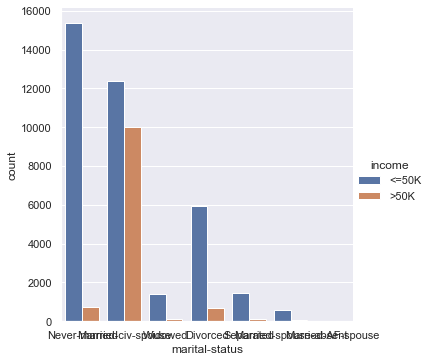

In [53]:
sns.catplot(data=df,x='marital-status',kind='count',hue='income')

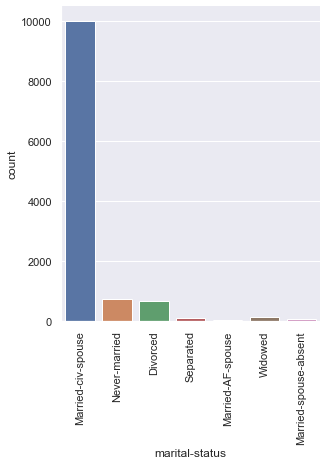

In [54]:
sns.set(rc={'figure.figsize':(20,15)})
fig = sns.catplot(data=rich,x='marital-status',kind='count')
_ =plt.xticks(rotation=90)
fig.savefig("r_mar.png")

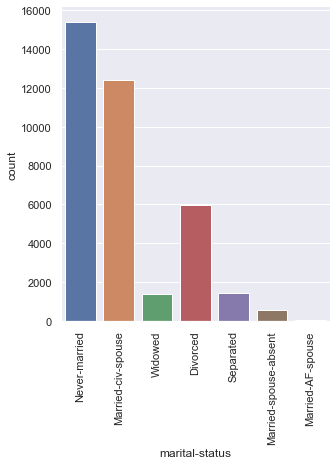

In [55]:
sns.set(rc={'figure.figsize':(20,15)})
fig = sns.catplot(data=poor,x='marital-status',kind='count')
_ =plt.xticks(rotation=90)
fig.savefig("p_mar.png")

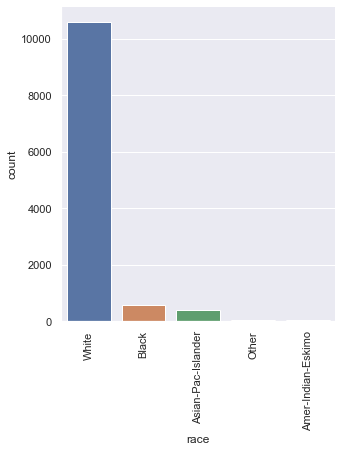

In [56]:
sns.set(rc={'figure.figsize':(20,15)})
fig = sns.catplot(data=rich,x='race',kind='count')
_ =plt.xticks(rotation=90)
fig.savefig("r_mar.png")

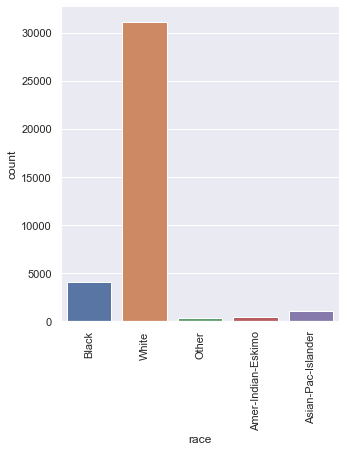

In [57]:
sns.set(rc={'figure.figsize':(20,15)})
fig = sns.catplot(data=poor,x='race',kind='count')
_ =plt.xticks(rotation=90)
fig.savefig("r_mar.png")